In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno

In [2]:
file1 = '/Users/Павел/Documents/Курсовой проект/XLS/Commodity.csv'
pdC = pd.read_csv(file1)
dfC = pdC.iloc[:,[0,1,3,4,6]]
dfC.head(2)

C:\Users\Павел\AppData\Local\Temp\ipykernel_8576\1950976369.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pdC = pd.read_csv(file1)


,country_or_area,year,commodity,flow,weight_kg
0,Afghanistan,2016,"Sheep, live",Export,2339.0
1,Afghanistan,2016,"Goats, live",Export,984.0


In [3]:
file2 = '/Users/Павел/Documents/Курсовой проект/XLS/Metro.csv'
pdM = pd.read_csv(file2)
dfM = pdM.iloc[:,[0,3,4,5,6]]
dfM.head(2)

,country,lines,stations,annual_ridership_mill,inauguration
0,China,249,5375,2.10,1969
1,United States,86,1228,0.75,1892


In [4]:
file3 = '/Users/Павел/Documents/Курсовой проект/XLS/GDP.csv'
pdG = pd.read_csv(file3)
dfG = pdG.iloc[:,[2,8,10]]
dfG.head(2)

,Area,Year,Value
0,Afghanistan,1970,78.697146
1,Afghanistan,1971,82.397024


In [5]:
file4 = '/Users/Павел/Documents/Курсовой проект/XLS/Population.csv'
pdP = pd.read_csv(file4)
dfP = pdP.iloc[:,[2,6,8,10]]
dfP.head(2)

,Area,Element,Year,Value
0,Afghanistan,Total Population - Both sexes,1950,7776.176
1,Afghanistan,Total Population - Both sexes,1951,7879.339


In [6]:
dfC1 = dfC.copy()
dfC1.insert(5, 'availability of metro', "No")
dfC1.head(2)

,country_or_area,year,commodity,flow,weight_kg,availability of metro
0,Afghanistan,2016,"Sheep, live",Export,2339.0,No
1,Afghanistan,2016,"Goats, live",Export,984.0,No


In [17]:
dfP.columns

Index(['Area', 'Element', 'Year', 'Value'], dtype='object')

In [8]:
dfC1.loc[dfC1['country_or_area'].isin(dfM['country']), 'availability of metro'] = "Yes"
dfC1.iloc[8350:8355]
dfC1

,country_or_area,year,commodity,flow,weight_kg,availability of metro
0,Afghanistan,2016,"Sheep, live",Export,2339.0,No
1,Afghanistan,2016,"Goats, live",Export,984.0,No
2,Afghanistan,2008,"Bovine animals, live pure-bred breeding",Import,272.0,No
3,Albania,2016,"Bovine animals, live, except pure-bred breeding",Import,1114023.0,No
4,Albania,2016,"Swine, live except pure-bred breeding > 50 kg",Import,9484953.0,No
...,...,...,...,...,...,...
8225866,Zimbabwe,2001,ALL COMMODITIES,Export,NaN,No
8225867,Zimbabwe,2001,ALL COMMODITIES,Re-Export,NaN,No
8225868,Zimbabwe,2000,ALL COMMODITIES,Export,NaN,No
8225869,Zimbabwe,1995,ALL COMMODITIES,Import,NaN,No


In [9]:
dfC2 = dfC1[dfC1['commodity'].str.contains('Chocolate', na=False)]
dfC2

,country_or_area,year,commodity,flow,weight_kg,availability of metro
1419283,Afghanistan,2016,Chocolate/cocoa food preparations nes,Import,26773009.0,No
1419284,Afghanistan,2015,Chocolate/cocoa food preparations nes,Import,17311405.0,No
1419285,Afghanistan,2011,Chocolate/cocoa food preparations nes,Import,28224723.0,No
1419286,Afghanistan,2010,Chocolate/cocoa food preparations nes,Import,18513933.0,No
1419287,Afghanistan,2009,Chocolate/cocoa food preparations nes,Import,12622414.0,No
...,...,...,...,...,...,...
1478253,Zimbabwe,1995,"Chocolate, cocoa preps, block, slab, bar, fill...",Export,621.0,No
1478254,Zimbabwe,1995,"Chocolate, cocoa prep, block/slab/bar, not fil...",Import,191.0,No
1478255,Zimbabwe,1995,"Chocolate, cocoa prep, block/slab/bar, not fil...",Export,58416.0,No
1478256,Zimbabwe,1995,Chocolate/cocoa food preparations nes,Import,386580.0,No


unique_count = filtered_df1.commodity.nunique()
unique_count

In [18]:
dfC3 = (
    dfC2[
        (dfC2['year'] >= 1991) &
        (dfC2['commodity'].str.contains('chocolate', case=False)) &
        (dfC2['flow'].isin(['Import', 'Re-Import']))
    ]
    .groupby(['country_or_area', 'year', 'availability of metro'], as_index=False)
    .agg(total_weight_kg=('weight_kg', 'sum'))
    .sort_values(['year', 'country_or_area'])
    .reset_index(drop=True)
)
dfC3

,country_or_area,year,availability of metro,total_weight_kg
0,Australia,1991,Yes,9116451.0
1,Bangladesh,1991,No,2562.0
2,Brazil,1991,Yes,477870.0
3,Canada,1991,Yes,60764263.0
4,Chile,1991,Yes,548695.0
...,...,...,...,...
3611,United Arab Emirates,2016,Yes,83704481.0
3612,United Kingdom,2016,Yes,439431236.0
3613,United Rep. of Tanzania,2016,No,957342.0
3614,Uruguay,2016,No,5378492.0


In [27]:
# Предположим, у нас уже есть DataFrame'ы:
# commodity_df - таблица Commodity
# population_df - таблица Population

## Шаг 1: Подготовка данных Population
# Фильтруем только нужные элементы (например, 'Total Population - Both sexes')
# И умножаем Value на 1000
population_prepared = dfP[dfP['Element'] == 'Total Population - Both sexes'].copy()
population_prepared['Population'] = population_prepared['Value'] * 1000

## Шаг 2: Объединение таблиц
# Вариант 1: merge с явным указанием столбцов
merged_df = pd.merge(
    dfC3,
    population_prepared[['Area', 'Year', 'Population']],  # Выбираем только нужные столбцы
    left_on=['country_or_area', 'year'],
    right_on=['Area', 'Year'],
    how='left'  # left join, чтобы сохранить все записи из Commodity
)

# Удаляем временные столбцы, если нужно
merged_df = merged_df.drop(['Area', 'Year'], axis=1)

merged_df

#print("\nПропущенные значения (стран без данных о населении):")
#(merged_df[merged_df['Population'].isna()][['country_or_area', 'year']].drop_duplicates())

,country_or_area,year,availability of metro,total_weight_kg,Population
0,Australia,1991,Yes,9116451.0,17353193.0
1,Bangladesh,1991,No,2562.0,113787109.0
2,Brazil,1991,Yes,477870.0,151724256.0
3,Canada,1991,Yes,60764263.0,28157158.0
4,Chile,1991,Yes,548695.0,13662491.0
...,...,...,...,...,...
3611,United Arab Emirates,2016,Yes,83704481.0,9030873.0
3612,United Kingdom,2016,Yes,439431236.0,NaN
3613,United Rep. of Tanzania,2016,No,957342.0,NaN
3614,Uruguay,2016,No,5378492.0,3379283.0


In [36]:
## 1. Удаление строк с пропущенными значениями
# Удаляем строки, где есть хотя бы один пропуск в любом столбце
merged_df_cleaned = merged_df.dropna()

## 2. Расчет показателя на душу населения
merged_df_cleaned['Human/kg'] = (
    merged_df_cleaned['total_weight_kg'] / merged_df_cleaned['Population']
)
merged_df_cleaned

C:\Users\Павел\AppData\Local\Temp\ipykernel_8576\849596558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['Human/kg'] = (


,country_or_area,year,availability of metro,total_weight_kg,Population,Human/kg
0,Australia,1991,Yes,9116451.0,17353193.0,0.525347
1,Bangladesh,1991,No,2562.0,113787109.0,0.000023
2,Brazil,1991,Yes,477870.0,151724256.0,0.003150
3,Canada,1991,Yes,60764263.0,28157158.0,2.158040
4,Chile,1991,Yes,548695.0,13662491.0,0.040161
...,...,...,...,...,...,...
3607,Togo,2016,No,362181.0,7858289.0,0.046089
3608,Tunisia,2016,No,3485834.0,11528674.0,0.302362
3611,United Arab Emirates,2016,Yes,83704481.0,9030873.0,9.268703
3614,Uruguay,2016,No,5378492.0,3379283.0,1.591607


In [37]:
# 4. Удаление строки с максимальным Human/kg
if not merged_df_cleaned.empty:
    max_hkg = merged_df_cleaned['Human/kg'].max()
    max_indices = merged_df_cleaned[merged_df_cleaned['Human/kg'] == max_hkg].index
    merged_df_final = merged_df_cleaned.drop(max_indices)
    print(f"Удалено {len(max_indices)} строк(и) с максимальным Human/kg = {max_hkg:.4f}")
else:
    merged_df_final = merged_df_cleaned.copy()
    print("DataFrame пуст - нечего удалять")

# 5. Сортировка по убыванию Human/kg
merged_df_sorted = merged_df_final.sort_values('Human/kg', ascending=False)

# 6. Вычисление средних значений по наличию метро
metro_stats = merged_df_final.groupby('availability of metro', as_index=False).agg(
    avg_Human_per_kg=('Human/kg', 'mean'),
    count_countries=('country_or_area', 'nunique')
).round(4)

# Вывод результатов
print("\nТоп-5 стран по потреблению на душу населения:")
print(merged_df_sorted[['country_or_area', 'year', 'Human/kg', 'availability of metro']].head())

print("\nСреднее потребление по наличию метро:")
print(metro_stats)

# Сохранение результатов
merged_df_sorted.to_csv('final_commodity_analysis.csv', index=False)
print("\nРезультаты сохранены в файл 'final_commodity_analysis.csv'")

Удалено 1 строк(и) с максимальным Human/kg = 1446.0455

Топ-5 стран по потреблению на душу населения:
     country_or_area  year   Human/kg availability of metro
3363         Bermuda  2015  71.592619                    No
249          Andorra  1995  33.934551                    No
3578           Palau  2016  28.895207                    No
362          Andorra  1996  27.255955                    No
3503         Bahrain  2016  26.045910                    No

Среднее потребление по наличию метро:
  availability of metro  avg_Human_per_kg  count_countries
0                    No            1.9026              130
1                   Yes            2.1824               45

Результаты сохранены в файл 'final_commodity_analysis.csv'


In [ ]:
# Создаем словарь для замены названий (пример)
country_mapping = {
    'United States': 'USA',
    'United Kingdom': 'UK',
    'Russia': 'Russian Federation',
    # Добавьте другие соответствия вручную
}

# Приводим названия стран к единому формату
population_df['country_or_area'] = population_df['country_or_area'].replace(country_mapping)

# Объединяем с df1
df1 = pd.merge(
    df1,
    population_df,
    on='country_or_area',
    how='left'  # Если страна не найдена, будет NaN
)

# Проверяем результат
print(df1[['country_or_area', 'Population']].head())

In [ ]:
import pycountry

def match_country(name):
    try:
        return pycountry.countries.lookup(name).name
    except:
        return None

population_df['standard_name'] = population_df['country_or_area'].apply(match_country)

In [4]:
# Проверка миссингов (отсутствуют)
df1.isna().sum()

country_or_area         0
year                    0
comm_code               0
commodity               0
flow                    0
trade_usd               0
weight_kg          128475
quantity_name           0
quantity           304857
category                0
dtype: int64

In [ ]:
# При анализе корреляции обнаружилась умеренная положительная корреляция (0.537) между тестовыми оценками по math и read. Это может указывать на то, что учащиеся, которые хорошо справляются с математикой, хороши и в чтении.
df1=df[['math','read','antisoc','income']]
df1.corr().round(3)

# При анализе корреляции обнаружилась умеренная положительная корреляция (0.537) между тестовыми оценками по math и read. Это может указывать на то, что учащиеся, которые хорошо справляются с математикой, хороши и в чтении.

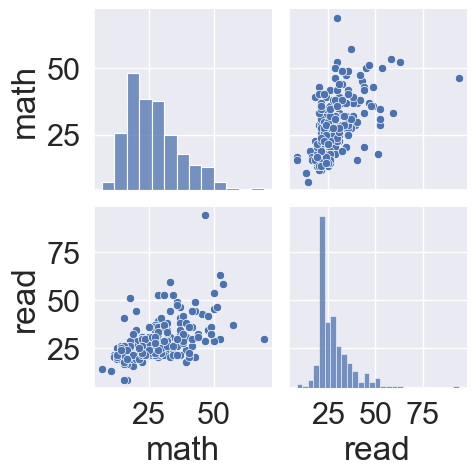

In [4]:
sns.set(style='ticks')
sns.set(font_scale=2)
sns.pairplot(df[['math','read']]);

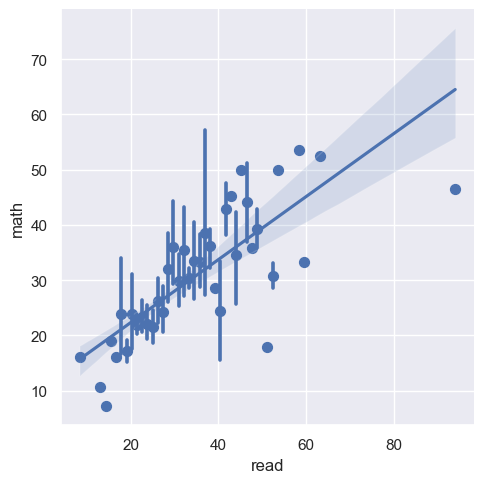

In [5]:
# Графическое изображение корреляции math и read
sns.set(font_scale=1)
sns.lmplot(x="read", y="math", data=df, x_estimator=np.mean);

In [6]:
# Проведение регрессионного анализа
df_ols = smf.ols(formula='math ~ antisoc  + income + read', data=df).fit()
df_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     40.47
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           3.46e-21
Time:                        11:44:48   Log-Likelihood:                -865.83
No. Observations:                 243   AIC:                             1740.
Df Residuals:                     239   BIC:                             1754.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8169      1.855      4.213      0.000       4.162      11.472
antisoc        0.5390      0.385      1.400      0.163      -0.220       1.298
income         0.1108      0.027      4.077      0.000       0.057       0.164
read           0.5490      0.056      9.788      0.000       0.438       0.659
==============================================================================
Omnibus:                       30.947   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.159
Skew:                           0.806   Prob(JB):                     4.25e-10
Kurtosis:                       4.291   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Первичные выводы:
1. При R-squared = 0.337 - модель имеет умеренную предсказательную силу.
2. При F-statistic = 40.47 и Prob (F-statistic) = 3.46e-21 - модель в целом статистически значима. Предикторы income и read	имеют значительное влияние на зависимую переменную - math
3. При Skew = 0.806 - модель имеет положительную асимметрию остатков. Это подтверждается тестом на нормальность (Шапиро-Уилка), где p-value: 1.73e-08 < 0.05
4. При P(antisoc) = 0.163 - предиктор "antisoc" не имеет значительного влияния на зависимую переменную - math.
5. При Durbin-Watson = 1.943 приблизительно равно 2 - указывает на отсутствие автокорреляции.
6. При Omnibus = 30.947 и Jarque-Bera = 43.159 - тесты на нормальность остатков указывают на то, что остатки не распределены нормально.

In [7]:
shapiro_test = stats.shapiro(df['math'])
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}')
print(f'p-value: {shapiro_test.pvalue:.10f}')

Shapiro-Wilk Test Statistic: 0.9393
p-value: 0.0000000173


Коэффициент асимметрии: 0.8895142551476454


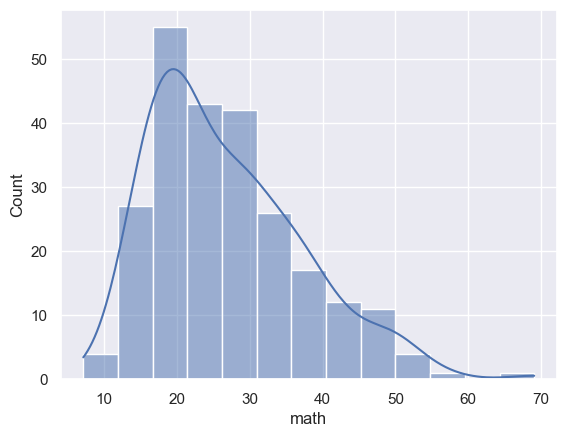

In [8]:
# Расчет коэффициента асимметрии
sns.histplot(data=df, x="math", kde=True)
skewness = df['math'].skew()
print(f'Коэффициент асимметрии: {skewness}')

In [9]:
# При проведении логарифмирования коэффициент асимметрии существенно не изменился, мультиколлинеарность увеличилась - т.е. метод не эффективен для данной модели
df_ols1 = smf.ols(formula='math ~ antisoc  + income + np.log(read)', data=df).fit()
df_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     43.68
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.53e-22
Time:                        11:44:56   Log-Likelihood:                -862.63
No. Observations:                 243   AIC:                             1733.
Df Residuals:                     239   BIC:                             1747.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -36.1671      5.830     -6.204      0.000     -47.652     -24.682
antisoc          0.4537      0.380      1.193      0.234      -0.295       1.203
income           0.1034      0.027      3.846      0.000       0.050       0.156
np.log(read)    18.1859      1.777     10.234      0.000      14.685      21.687
==============================================================================
Omnibus:                       29.980   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.327
Skew:                           0.805   Prob(JB):                     1.75e-09
Kurtosis:                       4.179   Cond. No.                         374.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Durbin-Watson = 1.943 приблизительно равно 2 - указывает на отсутствие автокорреляции. 
name = ["Durbin-Watson statistic"]
test = [sms.durbin_watson(df_ols.resid)]
lzip(name, test)

[('Durbin-Watson statistic', 1.9425224842269104)]

In [11]:
# Коэффициент инфляции дисперсии для всех предикторов находится в пределах 1.0-1.03 - указывает на отсутствие значительной мультиколлинеарности.
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
X = df_ols.model.exog
vif_data = pd.DataFrame()
vif_data["feature"] = df_ols.model.exog_names
vif_data["VIF"] = [VIF(X, i) for i in range(X.shape[1])]
print(vif_data)

     feature        VIF
0  Intercept  11.293256
1    antisoc   1.018248
2     income   1.026763
3       read   1.008450


In [12]:
# По итогу центрирования удалось уменьшить влияние мультиколлинеарности (Cond. No. 68 instead 141) 
df['logmath'] = np.log(df['math'])
df_centered = df.copy()
df_centered[['read', 'logmath']] = df[['read', 'logmath']] - df_centered[['read', 'logmath']].mean()
results2 = smf.ols("math ~ antisoc  + income + read", data=df_centered).fit() # data=dat_centered
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     40.47
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           3.46e-21
Time:                        11:45:04   Log-Likelihood:                -865.83
No. Observations:                 243   AIC:                             1740.
Df Residuals:                     239   BIC:                             1754.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.1419      1.100     21.042      0.0

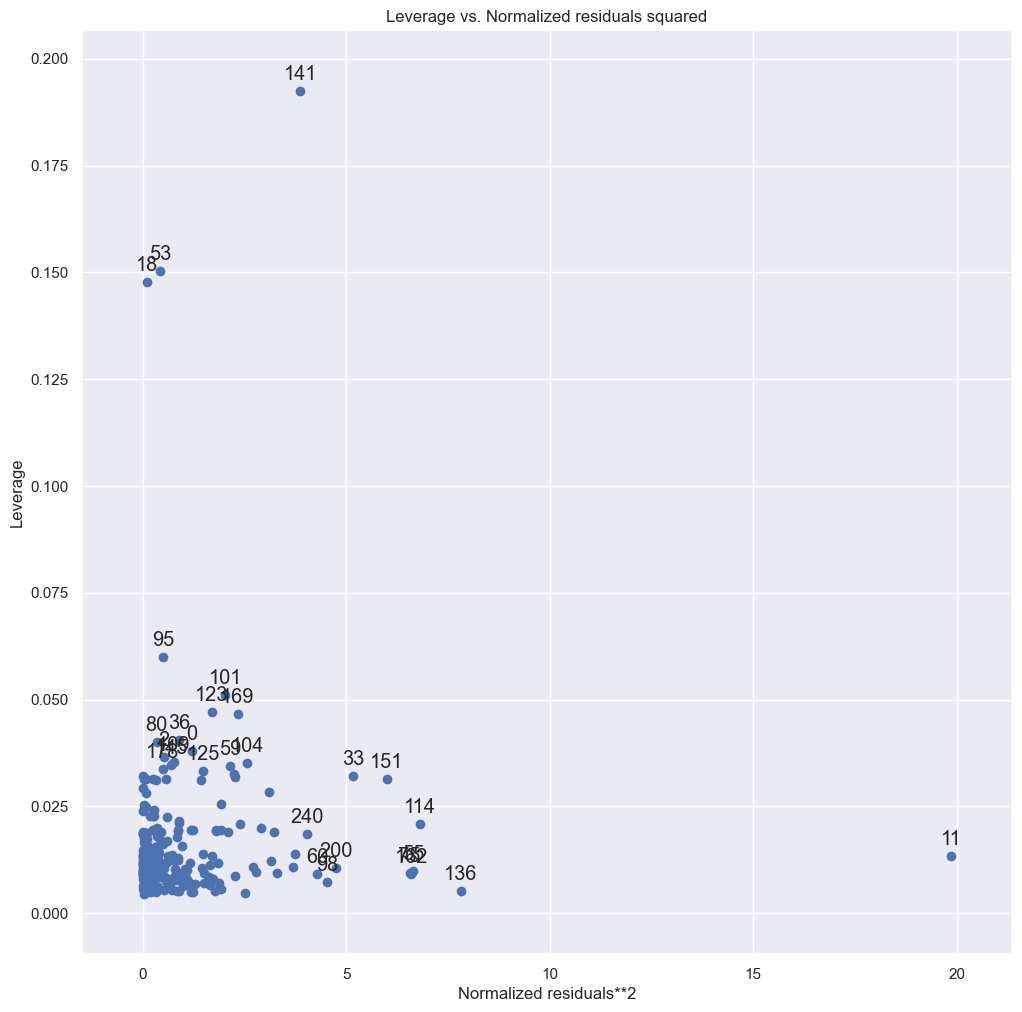

In [13]:
# На графике, показывающий влияние наблюдений на модель регрессии видно что наблюдения №11,18,53,141 являются аномальными.
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(12, 12))
fig = plot_leverage_resid2(df_ols, ax=ax)
fig;

In [14]:
# Результаты теста Бреуша-Пагана указывают на наличие гетероскедастичности в модели (при p-value = 0.022 < 0.05)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(df_ols.resid, df_ols.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 9.541308091727952),
 ('p-value', 0.022895947978503015),
 ('f-value', 3.25592594173499),
 ('f p-value', 0.022358427685870798)]

In [15]:
# Учитывая наличие гетероскедастичности применим робастную линейную модель
# В результате значение std err для read уменьшилось (0.049 instead 0.056)
df['logmath'] = np.log(df['math'])
res = sm.RLM(df['math'], df[['read','logmath']]).fit()
print(res.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   math   No. Observations:                  243
Model:                            RLM   Df Residuals:                      241
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 24 Mar 2025                                         
Time:                        11:45:13                                         
No. Iterations:                    20                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
read           0.2159      0.049      4.398      0.0

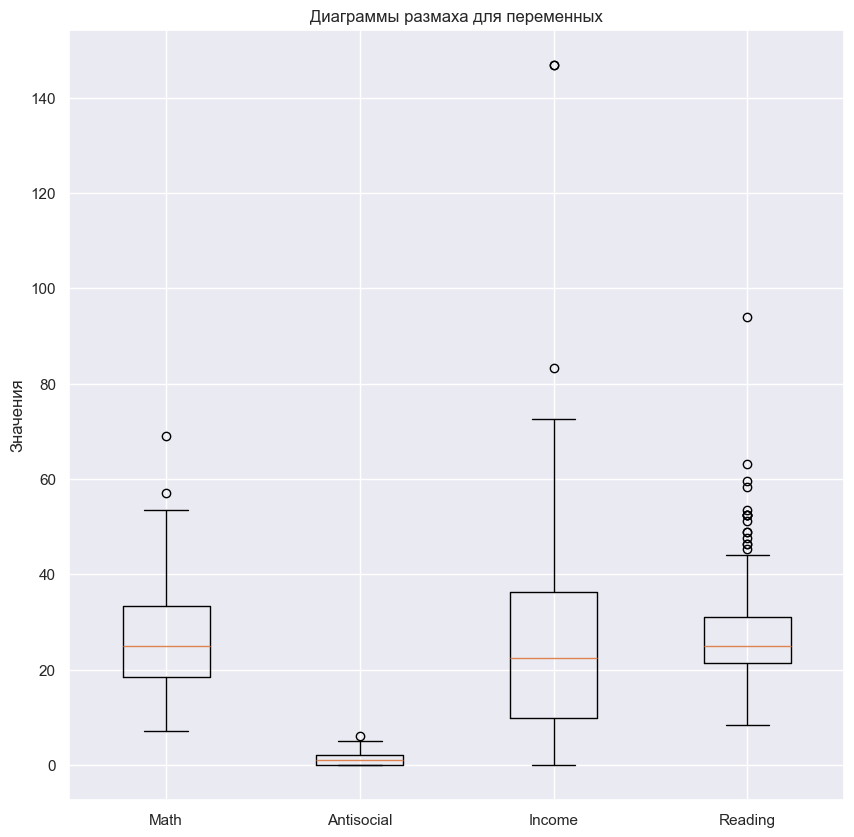

In [17]:
# При построении диаграммы размаха для переменных видно аномальное значение в income. Это указывает на значительный доход у одного из отцов и влияет на более широкий диапазон "коробок" на диаграмме.
plt.figure(figsize=(10, 10))
plt.boxplot([df['math'], df['antisoc'], df['income'], df['read']], 
            tick_labels=['Math', 'Antisocial', 'Income', 'Reading'])
plt.title('Диаграммы размаха для переменных')
plt.ylabel('Значения')
plt.grid(True)
plt.show()

# Итоговый вывод:
1. Предикторы income и read имеют значительное положительное влияние на math (p=0), в то время как влияние antisoc не является статистически значимым (p=0.163).